In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the data
production = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\production.csv')
temp_change = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\temperature_change.csv')
land_cover = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\land_cover.csv')
precip = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\precip.csv')
sea_level = pd.read_csv('D:\\git\\Climate_Impact_Agriculture_Yield\\data\\modified\\sea_level.csv')



In [3]:
pd.set_option('display.max_rows',100)
production[(production['Area'] == 'Afghanistan')&( production['Item'] == 'Apples')]

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
4,Afghanistan,Apples,Gross Production Value (constant 2014-2016 tho...,7.127000e+03,7.127000e+03,7.127000e+03,8.685000e+03,9.629000e+03,1.076200e+04,1.302700e+04,...,3.709800e+04,4.219800e+04,4.235400e+04,66506.0,80449.0,102515.0,1.181530e+05,1.278450e+05,1.518300e+05,1.500960e+05
5,Afghanistan,Apples,Gross Production Value (current thousand SLC),1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,...,6.336462e+08,6.835050e+08,6.994889e+08,4424354.0,6084815.0,4850210.0,9.634183e+08,1.071486e+09,1.297379e+09,1.563556e+09
6,Afghanistan,Apples,Gross Production Value (constant 2014-2016 tho...,3.664860e+05,3.664860e+05,3.664860e+05,4.465790e+05,4.951200e+05,5.533700e+05,6.698690e+05,...,1.907597e+06,2.169865e+06,2.177874e+06,3419801.0,4136755.0,5271382.0,6.075515e+06,6.573864e+06,7.807175e+06,7.718053e+06


In [4]:
grouped = production.groupby(['Area', 'Item'])['Element'].sum()
grouped

Area         Item                                                                     
Afghanistan  Agriculture                                                                  Gross Production Value (constant 2014-2016 tho...
             Almonds, in shell                                                            Gross Production Value (constant 2014-2016 tho...
             Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw    Gross Production Value (constant 2014-2016 tho...
             Apples                                                                       Gross Production Value (constant 2014-2016 tho...
             Apricots                                                                     Gross Production Value (constant 2014-2016 tho...
                                                                                                                ...                        
Zimbabwe     Unmanufactured tobacco                                      

In [5]:
grouped = production.groupby(['Area', 'Item','Element']).size().reset_index(name='Count')


In [6]:
production.Element.unique()

array(['Gross Production Value (constant 2014-2016 thousand I$)',
       'Gross Production Value (current thousand SLC)',
       'Gross Production Value (constant 2014-2016 thousand SLC)',
       'Gross Production Value (current thousand US$)',
       'Gross Production Value (constant 2014-2016 thousand US$)'],
      dtype=object)

In [7]:
production['Element'].unique()

array(['Gross Production Value (constant 2014-2016 thousand I$)',
       'Gross Production Value (current thousand SLC)',
       'Gross Production Value (constant 2014-2016 thousand SLC)',
       'Gross Production Value (current thousand US$)',
       'Gross Production Value (constant 2014-2016 thousand US$)'],
      dtype=object)

In [8]:
production = production[production['Element'] == 'Gross Production Value (constant 2014-2016 thousand I$)']
production.drop(columns = ['Element'],inplace = True)
production.reset_index(drop=True, inplace=True)

In [9]:
production.head()

,Area,Item,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,Afghanistan,"Almonds, in shell",1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,1.286500e+08,...,213443.0,138537.0,122590.0,166057.0,137986.0,173995.0,193168.0,198739.0,324884.0,323589.0
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",1.042449e+08,1.105186e+08,1.076921e+08,1.128735e+08,1.161324e+08,1.187102e+08,1.188556e+08,1.286500e+08,...,27170.0,46732.0,39124.0,37675.0,39633.0,38811.0,38706.0,39050.0,38856.0,38871.0
2,Afghanistan,Apples,7.127000e+03,7.127000e+03,7.127000e+03,8.685000e+03,9.629000e+03,1.076200e+04,1.302700e+04,1.316900e+04,...,37098.0,42198.0,42354.0,66506.0,80449.0,102515.0,118153.0,127845.0,151830.0,150096.0
3,Afghanistan,Apricots,2.621000e+04,2.621000e+04,2.621000e+04,3.210700e+04,3.554700e+04,3.964200e+04,4.807900e+04,4.865200e+04,...,73715.0,73715.0,71820.0,14656.0,107965.0,89347.0,105955.0,107942.0,169946.0,139655.0
4,Afghanistan,Barley,7.364400e+04,7.364400e+04,7.364400e+04,7.403400e+04,7.403400e+04,7.306000e+04,6.955300e+04,7.033200e+04,...,100141.0,101504.0,78515.0,58809.0,18508.0,11062.0,24076.0,24890.0,12684.0,21431.0


In [10]:
melted_production = pd.melt(production, id_vars=['Area','Item'],var_name='Year', value_name='Value')

In [11]:
melted_production.head()

,Area,Item,Year,Value
0,Afghanistan,"Almonds, in shell",Y1961,1.042449e+08
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Y1961,1.042449e+08
2,Afghanistan,Apples,Y1961,7.127000e+03
3,Afghanistan,Apricots,Y1961,2.621000e+04
4,Afghanistan,Barley,Y1961,7.364400e+04


In [12]:
pd.set_option('display.max_rows',10)
temp_change


,Unnamed: 0,Area,Months,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022,Y2023
0,0,Afghanistan,January,Temperature change,0.745,0.015,2.706,-5.250,1.854,3.796,...,1.716,2.017,3.594,1.367,2.111,2.911,-0.547,0.701,2.458,-2.200
1,2,Afghanistan,February,Temperature change,-1.787,2.390,3.875,-0.218,-0.100,3.529,...,-3.020,2.696,2.448,0.000,2.774,0.147,2.544,4.220,2.502,3.697
2,4,Afghanistan,March,Temperature change,0.445,1.268,0.365,1.632,-0.923,-0.010,...,-0.073,-0.465,2.468,0.994,4.632,0.360,0.664,2.625,3.756,3.895
3,6,Afghanistan,April,Temperature change,-1.786,0.040,0.859,-0.579,-1.850,-1.101,...,0.661,1.755,1.009,1.426,1.498,0.962,0.084,2.275,4.851,1.747
4,8,Afghanistan,May,Temperature change,1.351,-0.160,-0.727,-0.169,-0.190,-0.182,...,1.035,2.030,3.412,3.482,0.926,0.597,1.198,2.329,2.368,1.391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,9646,OECD,DecJanFeb,Temperature change,0.569,-0.355,-0.202,0.106,-0.727,-0.272,...,0.709,1.343,2.689,1.940,1.475,1.539,2.105,2.081,0.973,1.618
4824,9648,OECD,MarAprMay,Temperature change,-0.035,-0.185,0.148,-0.588,-0.104,-0.080,...,0.796,1.197,1.933,1.244,1.239,1.346,0.938,1.125,1.187,1.210
4825,9650,OECD,JunJulAug,Temperature change,0.105,0.054,-0.042,-0.107,-0.492,-0.013,...,0.789,0.950,1.314,1.083,1.083,1.062,1.305,1.387,1.499,1.743
4826,9652,OECD,SepOctNov,Temperature change,0.039,0.467,0.673,-0.146,-0.193,-0.291,...,0.998,1.679,1.535,1.204,0.577,1.214,1.376,1.763,1.289,2.254


we will focus only for the yearly values in the data 

In [13]:
temp_change = temp_change[temp_change['Months'] == 'Meteorological year']

In [14]:
temp_change.columns

Index(['Unnamed: 0', 'Area', 'Months', 'Element', 'Y1961', 'Y1962', 'Y1963',
       'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971',
       'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979',
       'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987',
       'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995',
       'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003',
       'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011',
       'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019',
       'Y2020', 'Y2021', 'Y2022', 'Y2023'],
      dtype='object')

In [15]:
temp_change.drop(columns=['Unnamed: 0','Months','Element'],inplace = True)

C:\Users\Ayman\AppData\Local\Temp\ipykernel_8660\817206406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_change.drop(columns=['Unnamed: 0','Months','Element'],inplace = True)


In [16]:
temp_change.columns

Index(['Area', 'Y1961', 'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967',
       'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975',
       'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983',
       'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991',
       'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999',
       'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007',
       'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021', 'Y2022', 'Y2023'],
      dtype='object')

In [24]:

# Reshape using pd.melt()
melted_temp = pd.melt(temp_change, id_vars=['Area'],var_name='Year', value_name='Temperature Change')

In [27]:
melted_temp

,Area,Year,Temperature Change
0,Afghanistan,Y1961,-0.126
1,Albania,Y1961,0.635
2,Algeria,Y1961,0.155
3,American Samoa,Y1961,0.121
4,Andorra,Y1961,0.756
...,...,...,...
17887,Low Income Food Deficit Countries,Y2023,1.389
17888,Net Food Importing Developing Countries,Y2023,1.505
17889,Annex I countries,Y2023,2.003
17890,Non-Annex I countries,Y2023,1.583


In [26]:
melted_production

,Area,Item,Year,Value
0,Afghanistan,"Almonds, in shell",Y1961,1.042449e+08
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Y1961,1.042449e+08
2,Afghanistan,Apples,Y1961,7.127000e+03
3,Afghanistan,Apricots,Y1961,2.621000e+04
4,Afghanistan,Barley,Y1961,7.364400e+04
...,...,...,...,...
1285069,Net Food Importing Developing Countries,Oilcrops Primary,Y2022,3.001882e+07
1285070,Net Food Importing Developing Countries,"Roots and Tubers, Total",Y2022,4.482258e+07
1285071,Net Food Importing Developing Countries,Sugar Crops Primary,Y2022,1.084941e+07
1285072,Net Food Importing Developing Countries,Vegetables and Fruit Primary,Y2022,1.026037e+08


In [28]:
merged = pd.merge(melted_production,melted_temp,on=['Area','Year'])

In [29]:
merged

,Area,Item,Year,Value,Temperature Change
0,Afghanistan,"Almonds, in shell",Y1961,1.042449e+08,-0.126
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",Y1961,1.042449e+08,-0.126
2,Afghanistan,Apples,Y1961,7.127000e+03,-0.126
3,Afghanistan,Apricots,Y1961,2.621000e+04,-0.126
4,Afghanistan,Barley,Y1961,7.364400e+04,-0.126
...,...,...,...,...,...
1285069,Net Food Importing Developing Countries,Oilcrops Primary,Y2022,3.001882e+07,1.058
1285070,Net Food Importing Developing Countries,"Roots and Tubers, Total",Y2022,4.482258e+07,1.058
1285071,Net Food Importing Developing Countries,Sugar Crops Primary,Y2022,1.084941e+07,1.058
1285072,Net Food Importing Developing Countries,Vegetables and Fruit Primary,Y2022,1.026037e+08,1.058


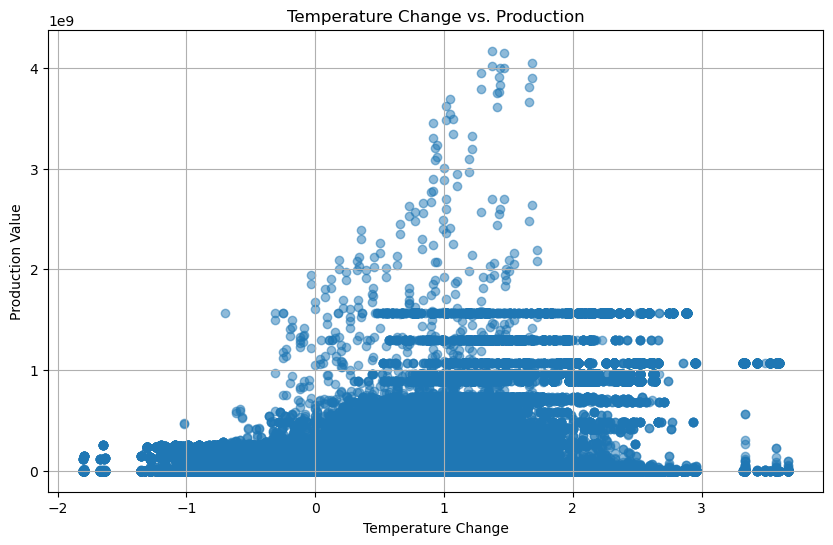

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged['Temperature Change'], merged['Value'], alpha=0.5)
plt.title('Temperature Change vs. Production')
plt.xlabel('Temperature Change')
plt.ylabel('Production Value')
plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.barplot(x='Item', y='Value', hue='Temperature Change', data=merged)
plt.title('Average Production Value by Fruit Type and Temperature Change')
plt.xlabel('Fruit Type')
plt.ylabel('Average Production Value')
plt.xticks(rotation=45)
plt.legend(title='Temperature Change')
plt.show()


In [ ]:
# Correlation between Temperature Change and Production Value
correlation = merged['Temperature Change'].corr(merged['Value'])
print(f"Correlation between Temperature Change and Production: {correlation}")

# Average production by fruit type
average_production_by_fruit = merged_data.groupby('Item')['Value'].mean()
print("Average Production by Fruit Type:")
print(average_production_by_fruit)
